Data Mining Assignment 3: Creating a CNN to correctly classify right number to the image. 

#### Load and prepare data for modeling

In [1]:
#create data labels for mnist
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [2]:
#import data
from tensorflow.keras.datasets import mnist

2023-04-20 19:21:46.267277: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#create training and test sets
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

X_train_raw.shape, y_train_raw.shape, X_test_raw.shape, y_test_raw.shape
#note package has 70000 data images(60000 for train and 10000 for test) in 28x28 grids with 1 color

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# create dummies for the target labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_raw, 10) #update to categorical with bianary filled columns
y_test = to_categorical(y_test_raw, 10)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [5]:
# normalize the training data
from tensorflow.keras.utils import normalize

X_train = normalize(X_train_raw, axis=1) #updates all to zero or one
X_test = normalize(X_test_raw, axis=1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10))

In [6]:
# sum of each column (number of images for each label)
y_train.sum(axis=0)
#can see its an unbalanced data set with about 6000 images for each type

array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
       5949.], dtype=float32)

#### Visualize data

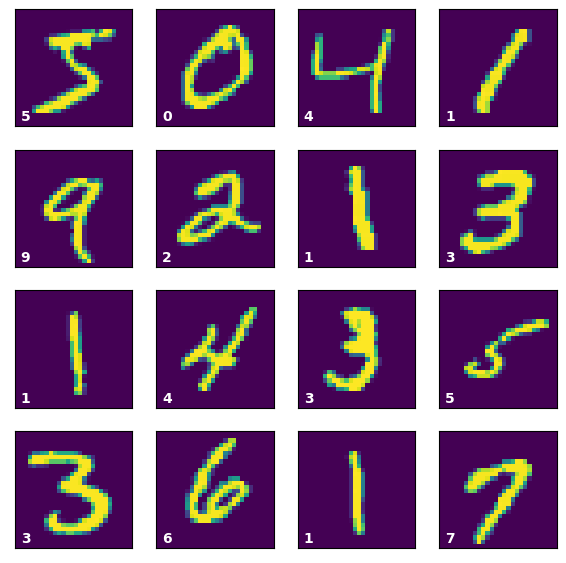

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, 
                         figsize=(7, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train_raw[i])
    
    act = class_labels[y_train_raw[i]]
    ax.text(0.05, 0.05, act, color='white', fontsize=10,
            weight='semibold', transform=ax.transAxes)

plt.show();

#### Build a NN model with hidden layers

In [8]:
from tensorflow import random as tf_random
import numpy as np
import random

def init_seeds(s):
    '''
    Initializes random seeds prior to model training 
    to ensure reproducibality of training results.
    '''
     #tensorflow requires multiple seeds
    tf_random.set_seed(s)
    np.random.seed(s)
    random.seed(s)

Build a NN model with three hidden layers.

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

# initialize seeds
init_seeds(321)

# prepare the model architecture
nn = Sequential(
    [
        Flatten(input_shape=(28, 28, 1)), #flatten matrix
        Dense(168, activation='relu'), #layer 1
        Dense(112, activation='relu'), #layer 2
        Dense(56, activation='relu'), #layer 3
        Dense(10, activation='softmax') #finally use softmax for probabilities
    ], 
    name='mlp_3hidden')

nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

# fit and validate the model
nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, shuffle=True);
#accuracy is good as well as val_accuracy

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2527 - accuracy: 0.9239 - val_loss: 0.1286 - val_accuracy: 0.9605
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1028 - accuracy: 0.9678 - val_loss: 0.1200 - val_accuracy: 0.9631
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0686 - accuracy: 0.9790 - val_loss: 0.0992 - val_accuracy: 0.9680
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0512 - accuracy: 0.9829 - val_loss: 0.0882 - val_accuracy: 0.9712
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0406 - accuracy: 0.9866 - val_loss: 0.0887 - val_accuracy: 0.9725
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0316 - accuracy: 0.9892 - val_loss: 0.0918 - val_accuracy: 0.9724
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0263 - accuracy: 0.9914 - val_loss: 0.0943 - val_accuracy:

In [10]:
loss, accuracy = nn.evaluate(X_test, y_test)
print(f'Loss: {loss:.2%}, Accuracy: {accuracy:.2%}')
#overall a good accuracy 

313/313 [==============================] - 0s 1ms/step - loss: 0.1018 - accuracy: 0.9753
Loss: 10.18%, Accuracy: 97.53%


#### Build a Convolutional Neural Network (CNN) model

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# initialize seeds
init_seeds(321)

cnn = Sequential(
    [
        Conv2D(filters=28, 
               kernel_size=(3, 3), #filter size
               activation='relu', 
               input_shape=(28, 28, 1)), #convolutional with filters
        MaxPooling2D((2, 2)), #filter 2x2 for pooling
        Flatten(), #flatten after convolutional state
        Dense(448, activation='relu'),
        Dense(56, activation='relu'),
        Dense(10, activation='softmax')
    ], 
    name='cnn')

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

cnn.fit(X_train, y_train, epochs=10, shuffle=True);
#accuracy increased

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1780 - accuracy: 0.9459
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0609 - accuracy: 0.9815
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0385 - accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0265 - accuracy: 0.9914
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0179 - accuracy: 0.9940
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0137 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0099 - accuracy: 0.9969
Epoch 8/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0101 - accuracy: 0.9965
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0078 - accuracy: 0.9973
Epoch 10/10
1875/1875 [==============================] - 37s 20m

In [12]:
loss, accuracy = cnn.evaluate(X_test, y_test)
print(f'Loss: {loss:.2%}, Accuracy: {accuracy:.2%}')
#Good accuracy. Even better than plain NN so continue with CNN 
#Can add hidden layers, extra neurons, optimizers, or change batch size to increase accuracy if needed

313/313 [==============================] - 2s 4ms/step - loss: 0.0785 - accuracy: 0.9836
Loss: 7.85%, Accuracy: 98.36%


In [13]:
# predicted probabilities for each class
probs = cnn.predict(X_test)
probs[:3]

313/313 [==============================] - 1s 4ms/step


array([[2.5630500e-12, 1.6207922e-09, 1.1699188e-08, 1.1070596e-11,
        6.3911834e-11, 2.1983916e-10, 1.4342483e-16, 9.9999994e-01,
        1.1656473e-11, 1.1751396e-10],
       [3.2246103e-19, 2.3226760e-07, 9.9999970e-01, 2.3058456e-18,
        2.5901407e-17, 3.1954181e-19, 1.2755546e-15, 1.5832469e-12,
        1.6137290e-19, 4.1327729e-23],
       [3.0975036e-14, 9.9999994e-01, 2.7784584e-15, 1.0055115e-16,
        8.1146746e-14, 9.6120108e-12, 1.8771518e-10, 1.4521352e-12,
        1.4155855e-12, 2.5823969e-13]], dtype=float32)

In [14]:
# grab the predictions (predicted labels) from the model
preds = [class_labels[np.argmax(p)] for p in probs]
preds[:3]
#use class labels to easily ID which pictures are highest probability

['7', '2', '1']

#### Visualize the predictions

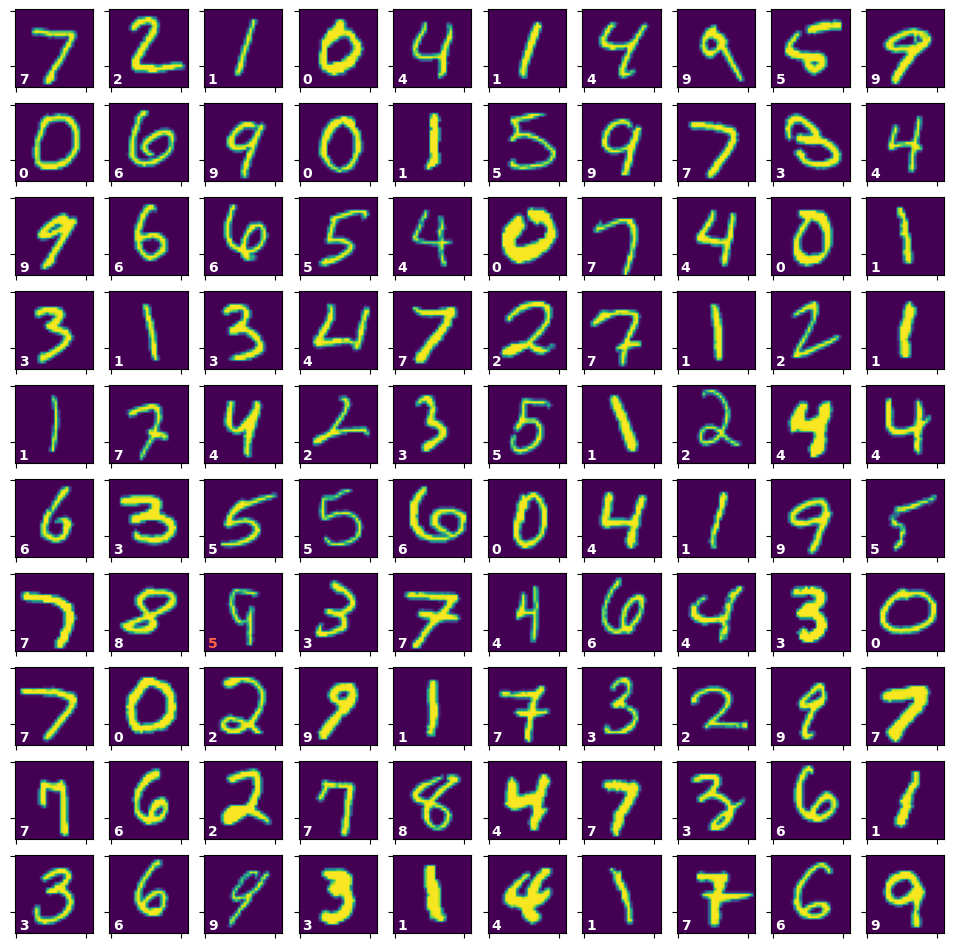

In [15]:
_, axes = plt.subplots(10, 10, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test_raw[i])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    pred = preds[i] #predicated label
    act = class_labels[y_test_raw[i]] #actual lable
    if pred == act:
        ax.text(0.05, 0.05, preds[i], color='white', #white if good
                weight='semibold', transform=ax.transAxes)
    else:
        ax.text(0.05, 0.05, preds[i], color='tomato', #red if bad
                weight='semibold', transform=ax.transAxes)
plt.show();